In [1]:
import tensorflow as tf

In [2]:
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.resnet50 import preprocess_input
from glob import glob
import matplotlib.pyplot as plt
from numpy import *

In [3]:
ims = [224,224]

train_path = "/Users/yashwadgave/Documents/Dataset/Train"
test_path = "/Users/yashwadgave/Documents/Dataset/Test"

In [4]:
mobilnet = VGG19(input_shape = ims+[3], weights='imagenet', include_top=False)

In [5]:
for layer in mobilnet.layers:
    layer.trainable = False

In [6]:
folders = glob("/Users/yashwadgave/Documents/Dataset/*")

In [7]:
folders

['/Users/yashwadgave/Documents/Dataset/Test',
 '/Users/yashwadgave/Documents/Dataset/Train',
 '/Users/yashwadgave/Documents/Dataset/Malaria Detection using Transfer Learning.ipynb']

In [8]:
x = tf.keras.layers.Flatten()(mobilnet.output)

In [9]:
prediction = tf.keras.layers.Dense(2, activation='softmax')(x)

model = tf.keras.Model(inputs=mobilnet.input, outputs=prediction)

In [10]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [11]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])

In [12]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255,
                                  shear_range=0.2,
                                  zoom_range=0.2,
                                  horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

In [13]:
train = train_datagen.flow_from_directory(train_path,target_size=(224,224),batch_size=32,class_mode='categorical')

Found 416 images belonging to 2 classes.


In [14]:
test = test_datagen.flow_from_directory(test_path,target_size=(224,224),batch_size=32,class_mode='categorical')

Found 134 images belonging to 2 classes.


In [15]:
history = model.fit(train,validation_data=test,epochs=20,steps_per_epoch=len(train),validation_steps=len(test))

Epoch 1/20
13/13 [==============================] - 25s 2s/step - loss: 1.6590 - acc: 0.4928 - val_loss: 0.7831 - val_acc: 0.6791
Epoch 2/20
13/13 [==============================] - 24s 2s/step - loss: 0.7841 - acc: 0.6058 - val_loss: 1.3269 - val_acc: 0.4179
Epoch 3/20
13/13 [==============================] - 24s 2s/step - loss: 0.5549 - acc: 0.7380 - val_loss: 0.5290 - val_acc: 0.7239
Epoch 4/20
13/13 [==============================] - 23s 2s/step - loss: 0.3750 - acc: 0.8293 - val_loss: 0.5264 - val_acc: 0.7687
Epoch 5/20
13/13 [==============================] - 24s 2s/step - loss: 0.3041 - acc: 0.9038 - val_loss: 0.4675 - val_acc: 0.8060
Epoch 6/20
13/13 [==============================] - 24s 2s/step - loss: 0.2810 - acc: 0.9038 - val_loss: 0.4393 - val_acc: 0.8209
Epoch 7/20
13/13 [==============================] - 24s 2s/step - loss: 0.2645 - acc: 0.8990 - val_loss: 0.3883 - val_acc: 0.7985
Epoch 8/20
13/13 [==============================] - 24s 2s/step - loss: 0.2562 - acc: 0.92

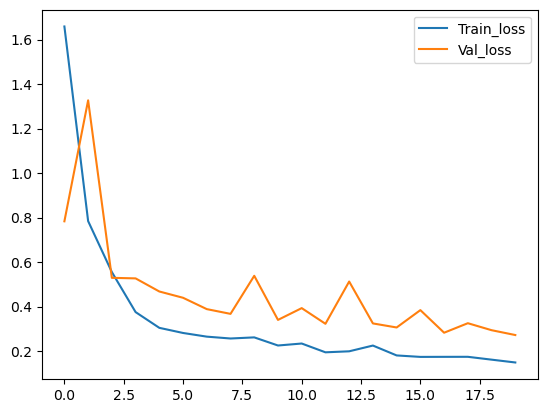

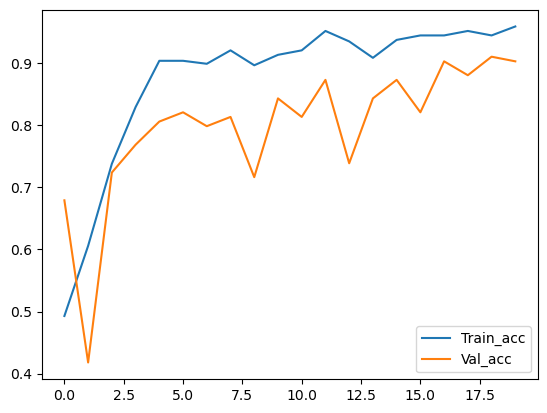

In [16]:
plt.plot(history.history['loss'],label='Train_loss')
plt.plot(history.history['val_loss'],label='Val_loss')
plt.legend()
plt.show()

plt.plot(history.history['acc'],label='Train_acc')
plt.plot(history.history['val_acc'],label='Val_acc')
plt.legend()
plt.show()

In [17]:
y_pred = model.predict(test)

In [18]:
y_pred

array([[9.93674159e-01, 6.32582279e-03],
       [1.31739154e-01, 8.68260920e-01],
       [1.31519556e-01, 8.68480504e-01],
       [3.73564631e-01, 6.26435399e-01],
       [9.53198254e-01, 4.68017682e-02],
       [9.95315671e-01, 4.68435232e-03],
       [9.72822368e-01, 2.71776970e-02],
       [7.19425142e-01, 2.80574858e-01],
       [9.97917354e-01, 2.08264845e-03],
       [9.10199225e-01, 8.98007974e-02],
       [8.49785984e-01, 1.50214016e-01],
       [9.23992455e-01, 7.60075748e-02],
       [2.46660069e-01, 7.53340006e-01],
       [2.39964619e-01, 7.60035396e-01],
       [6.77060246e-01, 3.22939873e-01],
       [4.60737683e-02, 9.53926265e-01],
       [2.12630883e-01, 7.87369072e-01],
       [8.90859306e-01, 1.09140746e-01],
       [8.54264617e-01, 1.45735323e-01],
       [8.38861585e-01, 1.61138445e-01],
       [6.86551392e-01, 3.13448668e-01],
       [9.50805366e-01, 4.91946116e-02],
       [9.88350272e-01, 1.16497101e-02],
       [9.99541402e-01, 4.58616356e-04],
       [9.824332

In [19]:
y_pred = argmax(y_pred, axis=1)

In [20]:
y_pred

array([0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1])

In [35]:
from tensorflow.keras.preprocessing import image

img = image.load_img("/Users/yashwadgave/Documents/Dataset/Train/Uninfected/C1_thinF_IMG_20150604_104722_cell_15.png",target_size=(224,224))

In [36]:
p = image.img_to_array(img)
p

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)

In [37]:
p=p/255

In [38]:
p

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)

In [39]:
p = expand_dims(p,axis=0)
img_data = preprocess_input(p)
img_data.shape

(1, 224, 224, 3)

In [40]:
l = model.predict(img_data)

In [41]:
a = argmax(l,axis=1)

In [42]:
if (a==1):
    print("Uninfected")
else:
    print("Infected")

Uninfected
